In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**[Task 1] Select features and categories for practice**

In [ ]:
dataset = load_iris()

# 'Versicolor' and 'Virginica' are labelled 1 and 2, respectively
# sepal_length and petal_length at columns 0 and 2, respectively
X = dataset.data[dataset.target != 0][:, [0, 2]]
y = dataset.target[dataset.target != 0]
data = np.concatenate([X, y[:, np.newaxis]], axis=1)
df = pd.DataFrame(data, columns=["sepal_length", "petal_length", "label"])
df.head()

,sepal_length,petal_length,label
0,7.0,4.7,1.0
1,6.4,4.5,1.0
2,6.9,4.9,1.0
3,5.5,4.0,1.0
4,6.5,4.6,1.0


**[Problem 2] Data analysis**

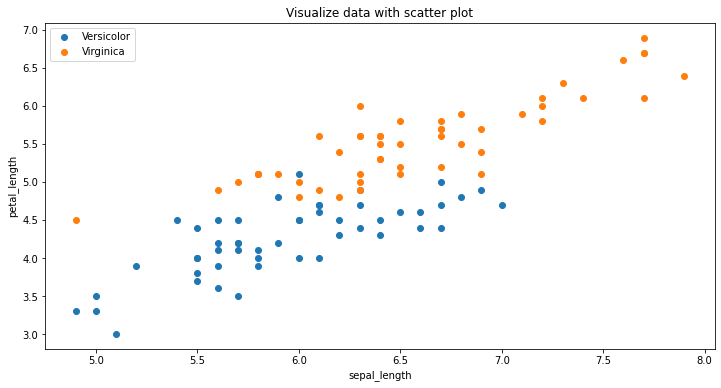

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Visualize data with scatter plot")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(df[df["label"] == 1]["sepal_length"], df[df["label"] == 1]["petal_length"], label="Versicolor")
plt.scatter(df[df["label"] == 2]["sepal_length"], df[df["label"] == 2]["petal_length"], label="Virginica")
plt.legend()
plt.show()

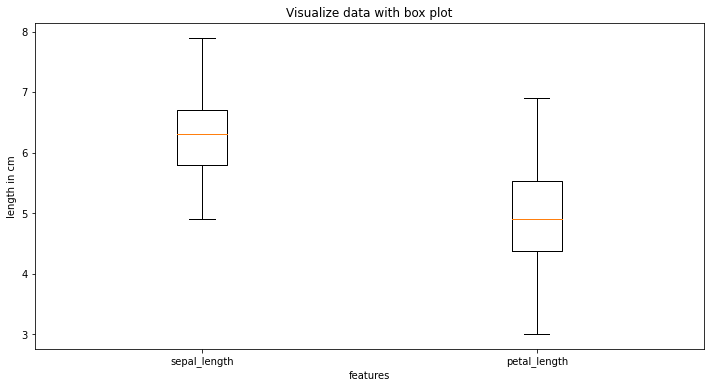

In [ ]:
cols = ["sepal_length", "petal_length"]
plt.figure(figsize=(12, 6))
plt.title("Visualize data with box plot")
plt.xlabel("features")
plt.ylabel("length in cm")
plt.boxplot([df[col] for col in cols], labels=cols)
plt.show()

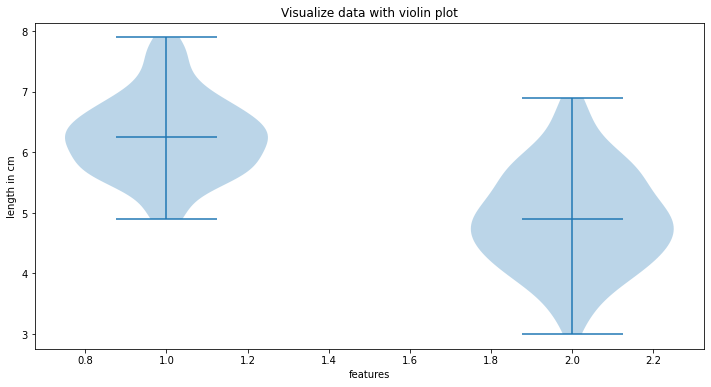

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Visualize data with violin plot")
plt.xlabel("features")
plt.ylabel("length in cm")
plt.violinplot([df[col] for col in cols], showmeans=True)
plt.show()

**[Problem 3] Division of preprocessing / training data and verification data**

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.values[:, :-1], df.values[:, -1]

# Split train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


**[Problem 4] Pretreatment/Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use ffit_transform for training set and transform for test set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**[Problem 5] Learning and estimation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 5 n_neighbors with uniform weights
model_5nn_uni = KNeighborsClassifier(n_neighbors=5)
model_5nn_uni.fit(X_train, y_train)
y_predict_5nn_uni = model_5nn_uni.predict(X_test)


# 5 n_neighbors with distance weights
model_5nn_dist = KNeighborsClassifier(n_neighbors=5, weights="distance")
model_5nn_dist.fit(X_train, y_train)
y_predict_5nn_dist = model_5nn_dist.predict(X_test)

print(f"Test    : {y_test}")
print(f"Uniform : {y_predict_5nn_uni}")
print(f"Distance: {y_predict_5nn_dist}")
print(f"Accuracy of 3NN with uniform weights: {100*accuracy_score(y_test, y_predict_5nn_uni):.2f}%")
print(f"Accuracy of 3NN with distance weights: {100*accuracy_score(y_test, y_predict_5nn_dist):.2f}%")

Test    : [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1.]
Uniform : [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]
Distance: [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]
Accuracy of 3NN with uniform weights: 88.00%
Accuracy of 3NN with distance weights: 92.00%


In [ ]:
# 1 n_neighbors with uniform weights
model_1nn_uni = KNeighborsClassifier(n_neighbors=1)
model_1nn_uni.fit(X_train, y_train)
y_predict_1nn_uni = model_1nn_uni.predict(X_test)


# 1 n_neighbors with distance weights
model_1nn_dist = KNeighborsClassifier(n_neighbors=1, weights="distance")
model_1nn_dist.fit(X_train, y_train)
y_predict_1nn_dist = model_1nn_dist.predict(X_test)

print(f"Test    : {y_test}")
print(f"Uniform : {y_predict_1nn_uni}")
print(f"Distance: {y_predict_1nn_dist}")
print(f"Accuracy of 3NN with uniform weights: {100*accuracy_score(y_test, y_predict_1nn_uni):.2f}%")
print(f"Accuracy of 3NN with distance weights: {100*accuracy_score(y_test, y_predict_1nn_dist):.2f}%")

Test    : [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1.]
Uniform : [1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]
Distance: [1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]
Accuracy of 3NN with uniform weights: 84.00%
Accuracy of 3NN with distance weights: 84.00%


In [ ]:
# 3 n_neighbors with uniform weights
model_3nn_uni = KNeighborsClassifier(n_neighbors=3)
model_3nn_uni.fit(X_train, y_train)
y_predict_3nn_uni = model_3nn_uni.predict(X_test)


# 3 n_neighbors with distance weights
model_3nn_dist = KNeighborsClassifier(n_neighbors=3, weights="distance")
model_3nn_dist.fit(X_train, y_train)
y_predict_3nn_dist = model_3nn_dist.predict(X_test)

print(f"Test    : {y_test}")
print(f"Uniform : {y_predict_3nn_uni}")
print(f"Distance: {y_predict_3nn_dist}")
print(f"Accuracy of 3NN with uniform weights: {100*accuracy_score(y_test, y_predict_3nn_uni):.2f}%")
print(f"Accuracy of 3NN with distance weights: {100*accuracy_score(y_test, y_predict_3nn_dist):.2f}%")

Test    : [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 1.]
Uniform : [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]
Distance: [1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]
Accuracy of 3NN with uniform weights: 92.00%
Accuracy of 3NN with distance weights: 92.00%


**[Problem 6] Evaluation**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

accuracy_5nn_uni = accuracy_score(y_test, y_predict_5nn_uni)
precision_5nn_uni = precision_score(y_test, y_predict_5nn_uni)
recall_5nn_uni = recall_score(y_test, y_predict_5nn_uni)
f1_score_5nn_uni = f1_score(y_test, y_predict_5nn_uni)
conf_mat_5nn_uni = confusion_matrix(y_test, y_predict_5nn_uni)

print("KneighborsClassifier with 5-NN using uniform weights")
print(f"Accuracy score: {accuracy_5nn_uni:.2f}")
print(f"Precision score: {precision_5nn_uni:.2f}")
print(f"Recall score: {recall_5nn_uni:.2f}")
print(f"F1 score: {f1_score_5nn_uni:.2f}")
print("Confusion matrix:\n", conf_mat_5nn_uni)

print("--------------------------")

accuracy_5nn_dist = accuracy_score(y_test, y_predict_5nn_dist)
precision_5nn_dist = precision_score(y_test, y_predict_5nn_dist)
recall_5nn_dist = recall_score(y_test, y_predict_5nn_dist)
f1_score_5nn_dist = f1_score(y_test, y_predict_5nn_dist)
conf_mat_5nn_dist = confusion_matrix(y_test, y_predict_5nn_dist)

print("KneighborsClassifier with 5-NN using distance weights")
print(f"Accuracy score: {accuracy_5nn_dist:.2f}")
print(f"Precision score: {precision_5nn_dist:.2f}")
print(f"Recall score: {recall_5nn_dist:.2f}")
print(f"F1 score: {f1_score_5nn_dist:.2f}")
print("Confusion matrix:\n", conf_mat_5nn_dist)

KneighborsClassifier with 5-NN using uniform weights
Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]
--------------------------
KneighborsClassifier with 5-NN using distance weights
Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


In [ ]:
accuracy_1nn_uni = accuracy_score(y_test, y_predict_1nn_uni)
precision_1nn_uni = precision_score(y_test, y_predict_1nn_uni)
recall_1nn_uni = recall_score(y_test, y_predict_1nn_uni)
f1_score_1nn_uni = f1_score(y_test, y_predict_1nn_uni)
conf_mat_1nn_uni = confusion_matrix(y_test, y_predict_1nn_uni)

print("KneighborsClassifier with 1-NN using uniform weights")
print(f"Accuracy score: {accuracy_1nn_uni:.2f}")
print(f"Precision score: {precision_1nn_uni:.2f}")
print(f"Recall score: {recall_1nn_uni:.2f}")
print(f"F1 score: {f1_score_1nn_uni:.2f}")
print("Confusion matrix:\n", conf_mat_1nn_uni)

print("--------------------------")

accuracy_1nn_dist = accuracy_score(y_test, y_predict_1nn_dist)
precision_1nn_dist = precision_score(y_test, y_predict_1nn_dist)
recall_1nn_dist = recall_score(y_test, y_predict_1nn_dist)
f1_score_1nn_dist = f1_score(y_test, y_predict_1nn_dist)
conf_mat_1nn_dist = confusion_matrix(y_test, y_predict_1nn_dist)

print("KneighborsClassifier with 1-NN using distance weights")
print(f"Accuracy score: {accuracy_1nn_dist:.2f}")
print(f"Precision score: {precision_1nn_dist:.2f}")
print(f"Recall score: {recall_1nn_dist:.2f}")
print(f"F1 score: {f1_score_1nn_dist:.2f}")
print("Confusion matrix:\n", conf_mat_1nn_dist)

KneighborsClassifier with 1-NN using uniform weights
Accuracy score: 0.84
Precision score: 0.91
Recall score: 0.77
F1 score: 0.83
Confusion matrix:
 [[10  3]
 [ 1 11]]
--------------------------
KneighborsClassifier with 1-NN using distance weights
Accuracy score: 0.84
Precision score: 0.91
Recall score: 0.77
F1 score: 0.83
Confusion matrix:
 [[10  3]
 [ 1 11]]


In [ ]:
accuracy_3nn_uni = accuracy_score(y_test, y_predict_3nn_uni)
precision_3nn_uni = precision_score(y_test, y_predict_3nn_uni)
recall_3nn_uni = recall_score(y_test, y_predict_3nn_uni)
f1_score_3nn_uni = f1_score(y_test, y_predict_3nn_uni)
conf_mat_3nn_uni = confusion_matrix(y_test, y_predict_3nn_uni)

print("KneighborsClassifier with 3-NN using uniform weights")
print(f"Accuracy score: {accuracy_3nn_uni:.2f}")
print(f"Precision score: {precision_3nn_uni:.2f}")
print(f"Recall score: {recall_3nn_uni:.2f}")
print(f"F1 score: {f1_score_3nn_uni:.2f}")
print("Confusion matrix:\n", conf_mat_3nn_uni)

print("--------------------------")

accuracy_3nn_dist = accuracy_score(y_test, y_predict_3nn_dist)
precision_3nn_dist = precision_score(y_test, y_predict_3nn_dist)
recall_3nn_dist = recall_score(y_test, y_predict_3nn_dist)
f1_score_3nn_dist = f1_score(y_test, y_predict_3nn_dist)
conf_mat_3nn_dist = confusion_matrix(y_test, y_predict_3nn_dist)

print("KneighborsClassifier with 3-NN using distance weights")
print(f"Accuracy score: {accuracy_3nn_dist:.2f}")
print(f"Precision score: {precision_3nn_dist:.2f}")
print(f"Recall score: {recall_3nn_dist:.2f}")
print(f"F1 score: {f1_score_3nn_dist:.2f}")
print("Confusion matrix:\n", conf_mat_3nn_dist)

KneighborsClassifier with 3-NN using uniform weights
Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]
--------------------------
KneighborsClassifier with 3-NN using distance weights
Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]



Accuracy score: The ratio of number of correct predictions to the total number of input samples

$$Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions made}}$$
Precision score: Answer the question "How many selected items are relevant?" 
The formula:

$$Precision = \frac{\text{True Positive}}{\text{True Positive + False Positive}}$$
Recall score: Answer the question "How many relevant items are selected?"
The formula:

$$Recall = \frac{\text{True Positive}}{\text{True Positive + False Negative}}$$
F1 score: The harmonic mean of Precision and Recall, it seeks for balance between the two

$$F1 = \frac{2 * \text{Precision} * \text{Recall}}{\text{Precision + Recall}}$$

**[Problem 7] Visualization**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Visualize decision region of KNeighborsClassifier 5-NN
Training set with uniform model


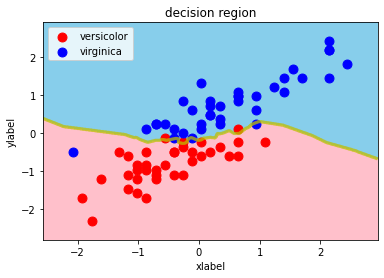

Test set with uniform model


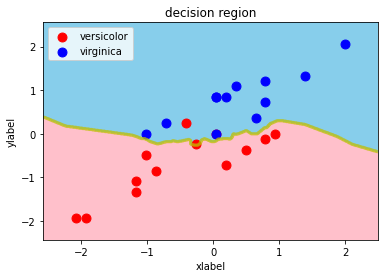

Training set with distance model


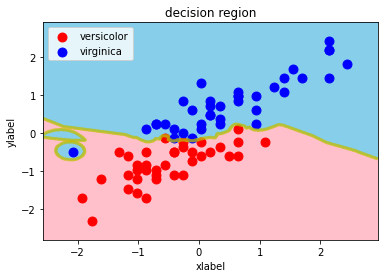

Test set with distance model


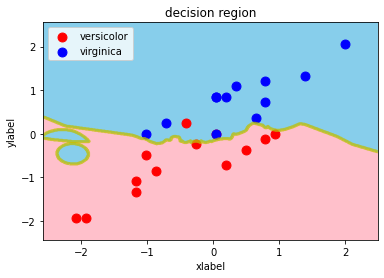

In [ ]:
print("Visualize decision region of KNeighborsClassifier 5-NN")
print("Training set with uniform model")
decision_region(X_train, y_train, model_5nn_uni)
print("Test set with uniform model")
decision_region(X_test, y_test, model_5nn_uni)

print("Training set with distance model")
decision_region(X_train, y_train, model_5nn_dist)
print("Test set with distance model")
decision_region(X_test, y_test, model_5nn_dist)

Visualize decision region of KNeighborsClassifier 1-NN
Training set with uniform model


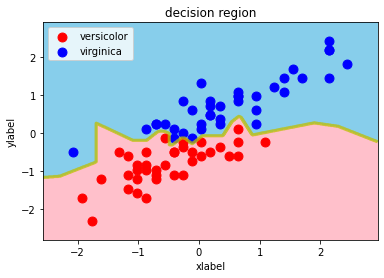

Test set with uniform model


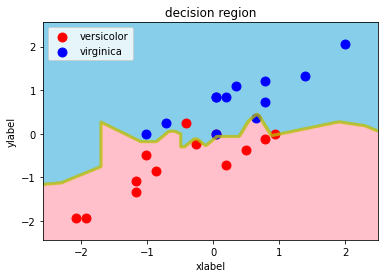

Training set with distance model


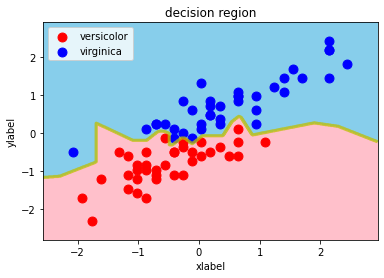

Test set with distance model


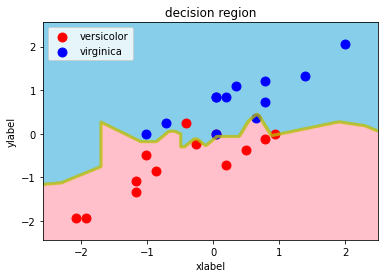

In [ ]:
print("Visualize decision region of KNeighborsClassifier 1-NN")
print("Training set with uniform model")
decision_region(X_train, y_train, model_1nn_uni)
print("Test set with uniform model")
decision_region(X_test, y_test, model_1nn_uni)

print("Training set with distance model")
decision_region(X_train, y_train, model_1nn_dist)
print("Test set with distance model")
decision_region(X_test, y_test, model_1nn_dist)

Visualize decision region of KNeighborsClassifier 3-NN
Training set with uniform model


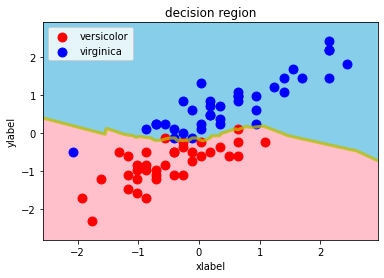

Test set with uniform model


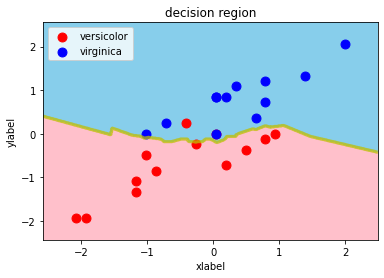

Training set with distance model


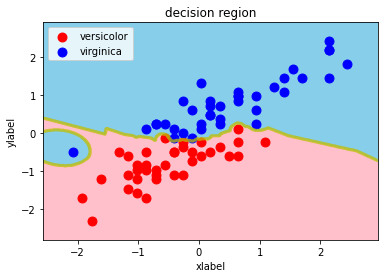

Test set with distance model


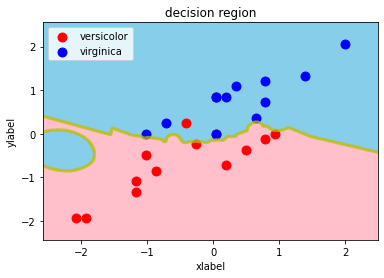

In [ ]:
print("Visualize decision region of KNeighborsClassifier 3-NN")
print("Training set with uniform model")
decision_region(X_train, y_train, model_3nn_uni)
print("Test set with uniform model")
decision_region(X_test, y_test, model_3nn_uni)

print("Training set with distance model")
decision_region(X_train, y_train, model_3nn_dist)
print("Test set with distance model")
decision_region(X_test, y_test, model_3nn_dist)

**[Problem 8] Learning by other methods**

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


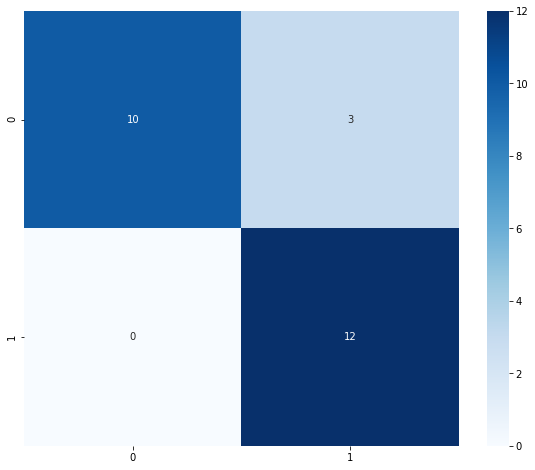

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def score_metrics(y_true, y_pred, average='binary'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    conf_mat = confusion_matrix(y_true, y_pred)
    print(f"Accuracy score: {accuracy:.2f}")
    print(f"Precision score: {precision:.2f}")
    print(f"Recall score: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print("Confusion matrix:\n", conf_mat)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, cmap="Blues", annot=True, square=True)
    plt.show()
    return np.array([accuracy, precision, recall, f1])

knn_scores = score_metrics(y_test, y_predict_5nn_uni)

Logistic Regression

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


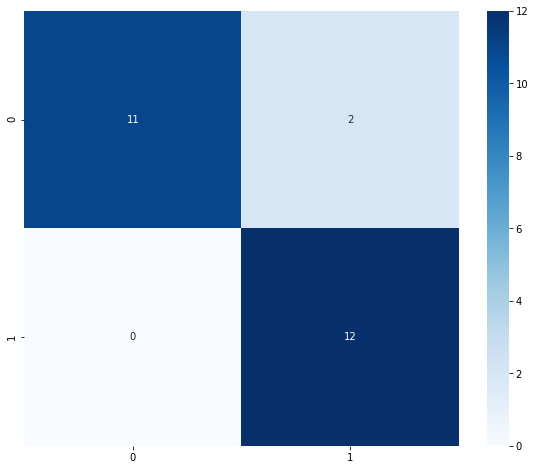

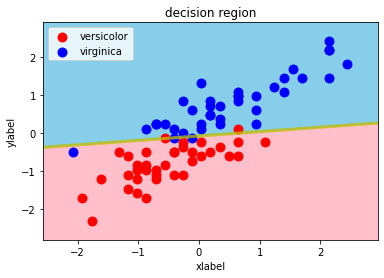

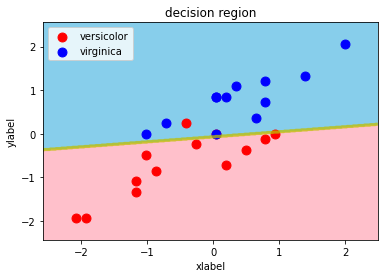

In [ ]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
y_predict_lor = lor.predict(X_test)
lor_scores = score_metrics(y_test, y_predict_lor)
decision_region(X_train, y_train, lor)
decision_region(X_test, y_test, lor)

Support vector machine

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


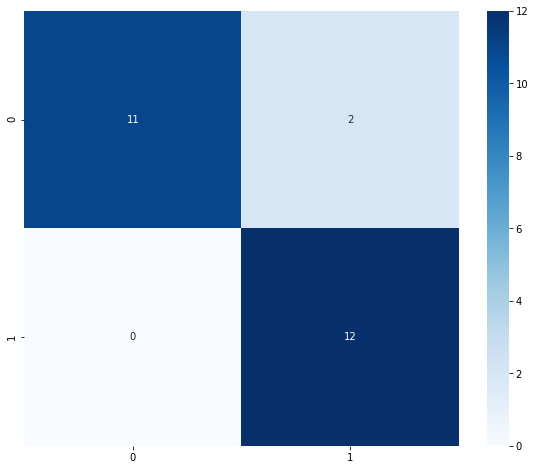

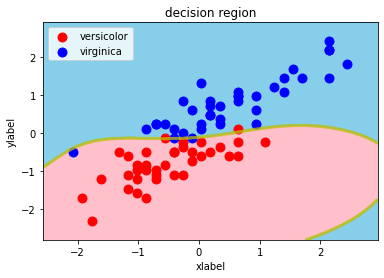

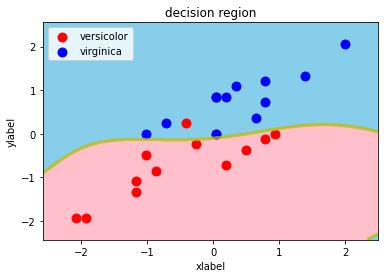

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)
svc_scores = score_metrics(y_test, y_predict_svc)
decision_region(X_train, y_train, svc)
decision_region(X_test, y_test, svc)

Decision tree

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


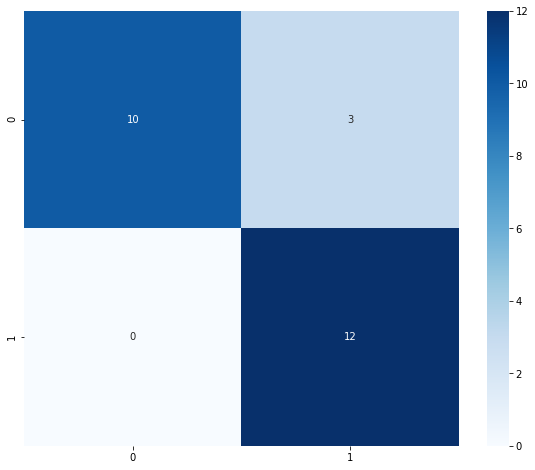

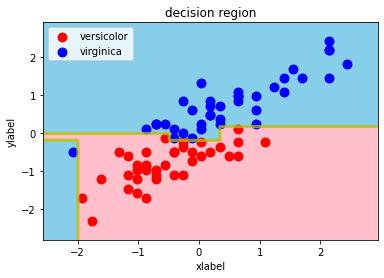

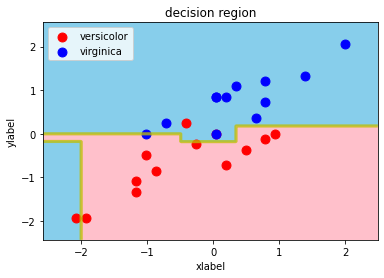

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_predict_tree = tree.predict(X_test)
tree_scores = score_metrics(y_test, y_predict_tree)
decision_region(X_train, y_train, tree)
decision_region(X_test, y_test, tree)

Random forest

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


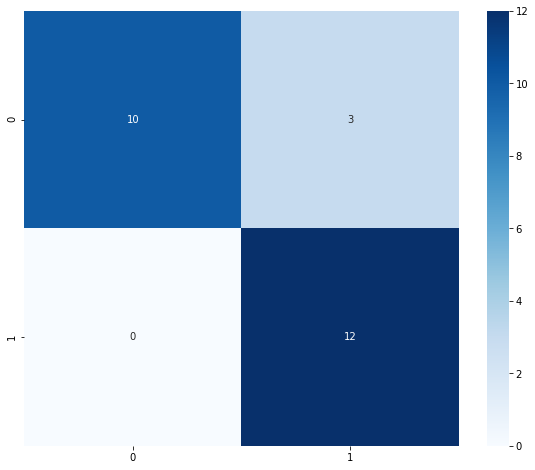

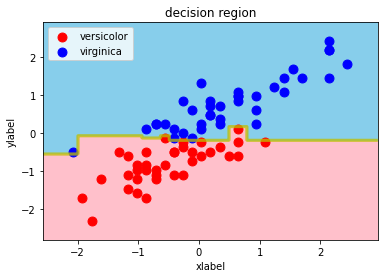

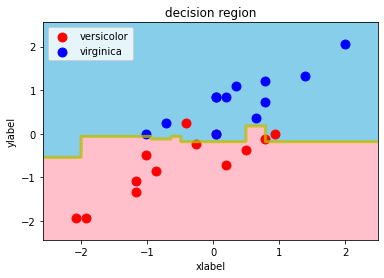

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict_forest = forest.predict(X_test)
forest_scores = score_metrics(y_test, y_predict_forest)
decision_region(X_train, y_train, forest)
decision_region(X_test, y_test, forest)

In [ ]:
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1_score']
model_names = ['KNeighbors (5-NN)', 'LogisticRegression', 'SVC', 'DecisionTree', 'RandomForest']
combine = np.vstack([knn_scores, lor_scores, svc_scores, tree_scores, forest_scores])
index_df = pd.DataFrame(combine, index=model_names, columns=score_labels)
index_df

,Accuracy,Precision,Recall,F1_score
KNeighbors (5-NN),0.88,1.0,0.769231,0.869565
LogisticRegression,0.92,1.0,0.846154,0.916667
SVC,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.88,1.0,0.769231,0.869565


**[Problem 9] (Advanced task) Comparison with and without standardization**

In [ ]:
# Reload X, y without using standardization
def train_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = score_metrics(y_test, y_pred)
    decision_region(X_train, y_train, model)
    decision_region(X_test, y_test, model)
    return scores

# Reload data no standardization
X, y = np.array(df.values[:, :-1]), np.array(df.values[:, -1])
X_train_no_std, X_test_no_std, y_train_no_std, y_test_no_std = train_test_split(X, y, test_size=0.25, random_state=0)

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


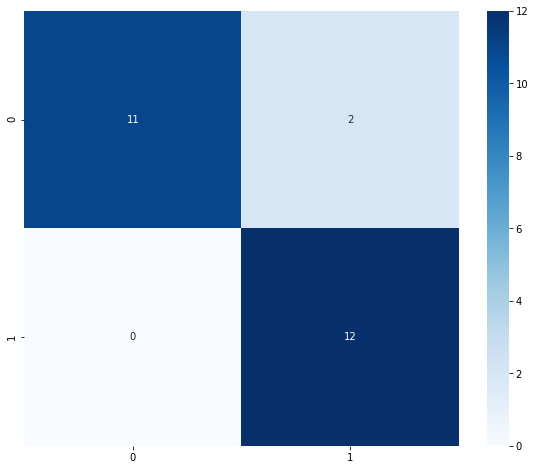

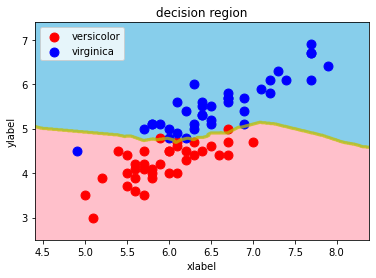

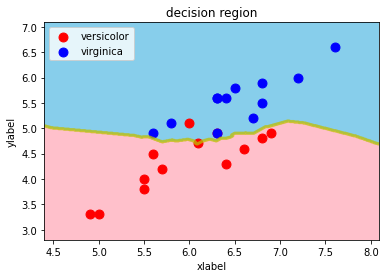

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


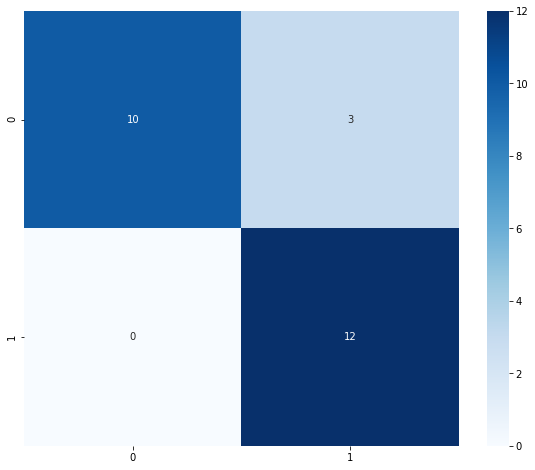

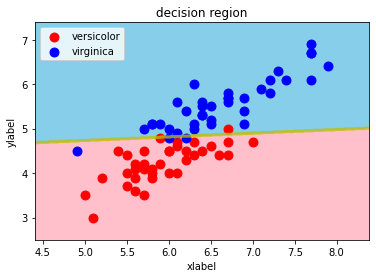

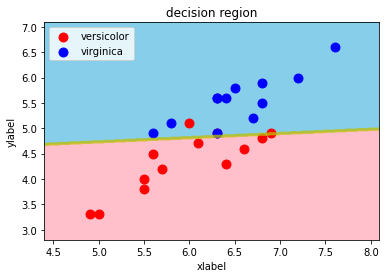

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


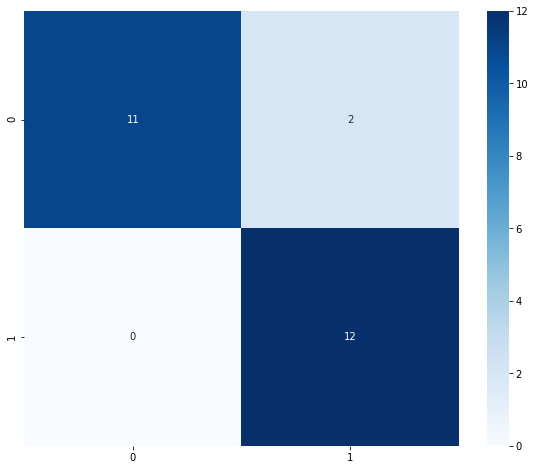

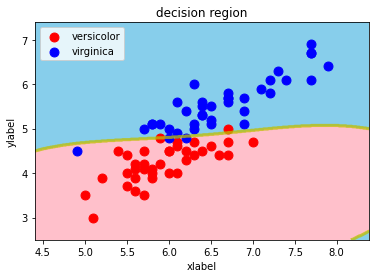

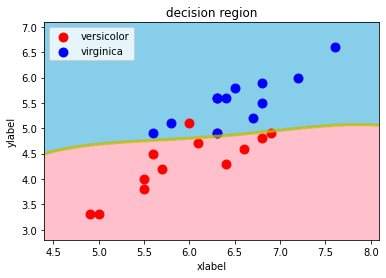

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


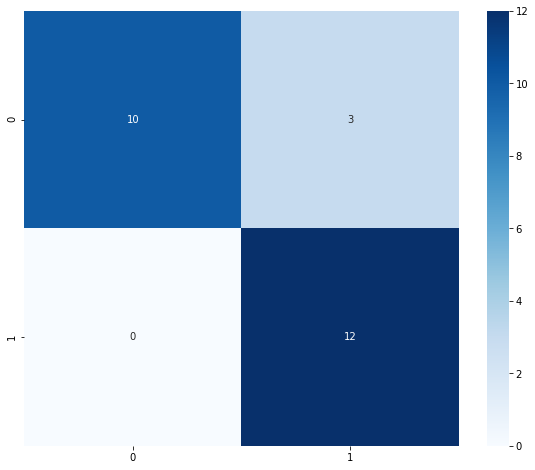

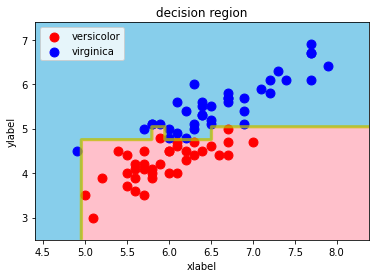

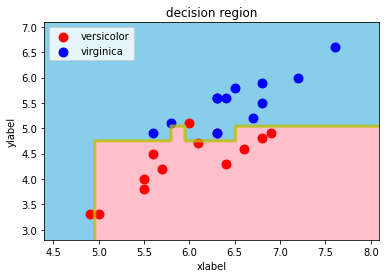

Accuracy score: 0.84
Precision score: 1.00
Recall score: 0.69
F1 score: 0.82
Confusion matrix:
 [[ 9  4]
 [ 0 12]]


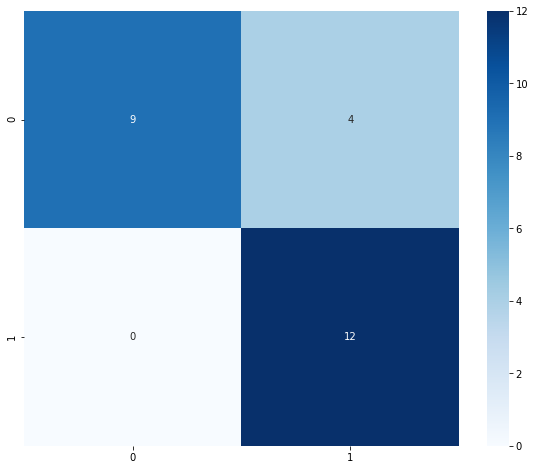

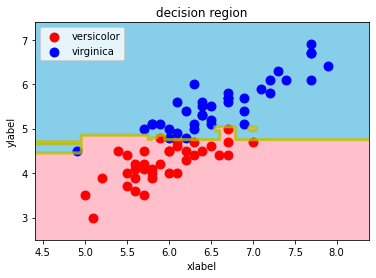

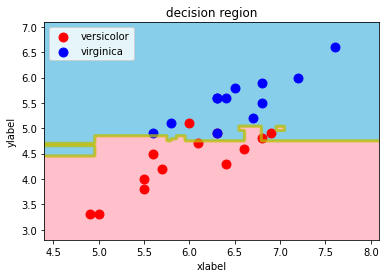

,Accuracy,Precision,Recall,F1_score
KNeighbors (5-NN),0.92,1.0,0.846154,0.916667
LogisticRegression,0.88,1.0,0.769231,0.869565
SVC,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.84,1.0,0.692308,0.818182


In [ ]:
scores = np.vstack([train_model(X_train_no_std, y_train_no_std, X_test_no_std, y_test_no_std, KNeighborsClassifier()),
                    train_model(X_train_no_std, y_train_no_std, X_test_no_std, y_test_no_std, LogisticRegression()),
                    train_model(X_train_no_std, y_train_no_std, X_test_no_std, y_test_no_std, SVC()),
                    train_model(X_train_no_std, y_train_no_std, X_test_no_std, y_test_no_std, DecisionTreeClassifier()),
                    train_model(X_train_no_std, y_train_no_std, X_test_no_std, y_test_no_std, RandomForestClassifier())])
index_df = pd.DataFrame(scores, index=model_names, columns=score_labels)
index_df

**[Problem 10] (Advance assignment) Highly accurate method using all objective variables**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region_multiclass(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['Setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lime']
    n_class = len(set(y))
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [ ]:
# Load all classes
new_X = dataset.data[:, [0, 2]]
new_y = dataset.target

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=0)
new_scaler = StandardScaler()
new_X_train = new_scaler.fit_transform(new_X_train)
new_X_test = new_scaler.transform(new_X_test)

Accuracy score: 0.95
Precision score: 0.95
Recall score: 0.95
F1 score: 0.95
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


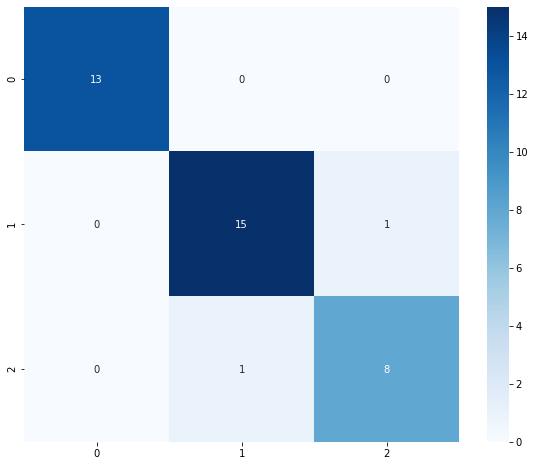

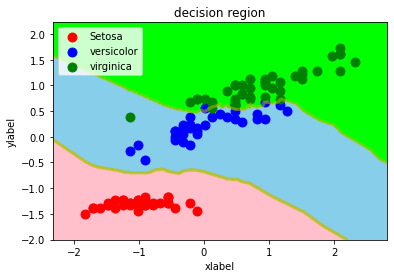

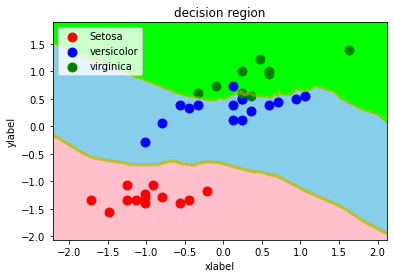

Accuracy score: 0.95
Precision score: 0.95
Recall score: 0.95
F1 score: 0.95
Confusion matrix:
 [[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


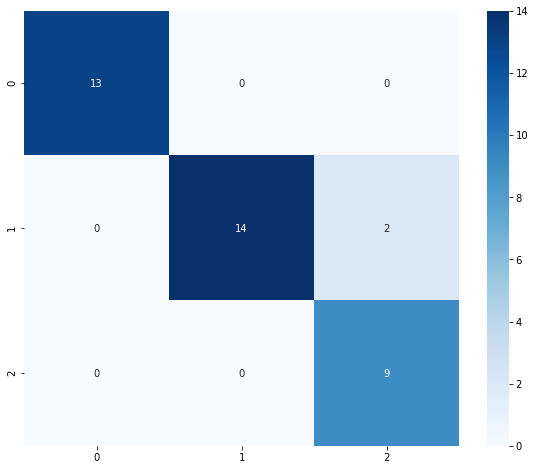

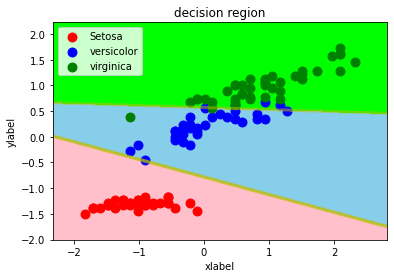

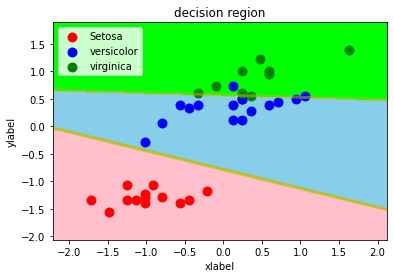

Accuracy score: 0.95
Precision score: 0.95
Recall score: 0.95
F1 score: 0.95
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


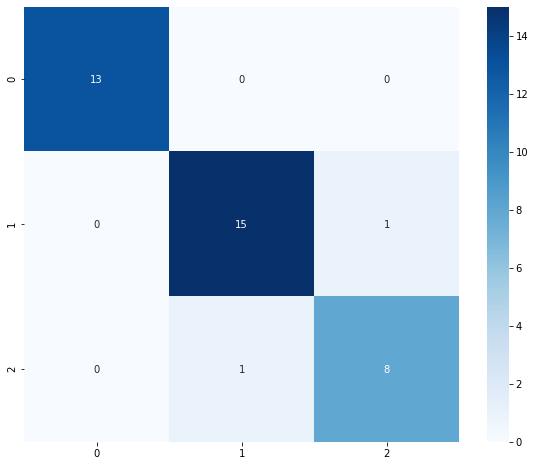

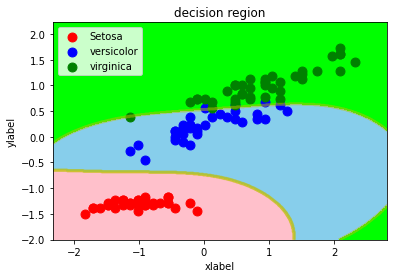

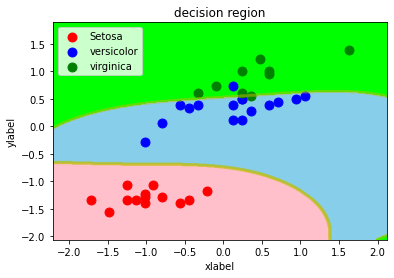

Accuracy score: 0.92
Precision score: 0.92
Recall score: 0.92
F1 score: 0.92
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


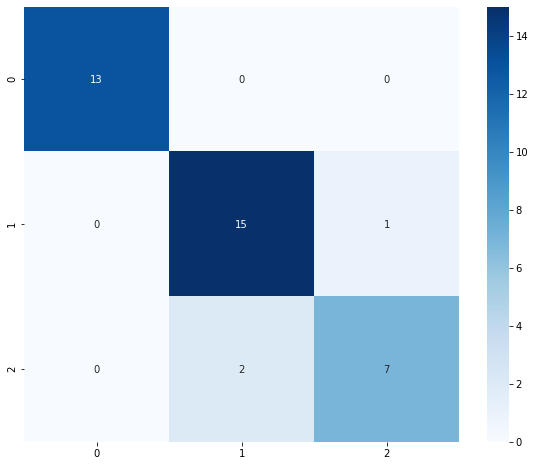

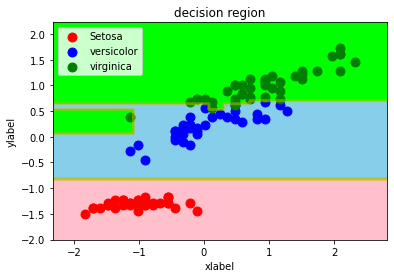

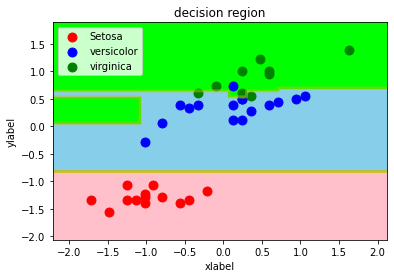

Accuracy score: 0.92
Precision score: 0.92
Recall score: 0.92
F1 score: 0.92
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


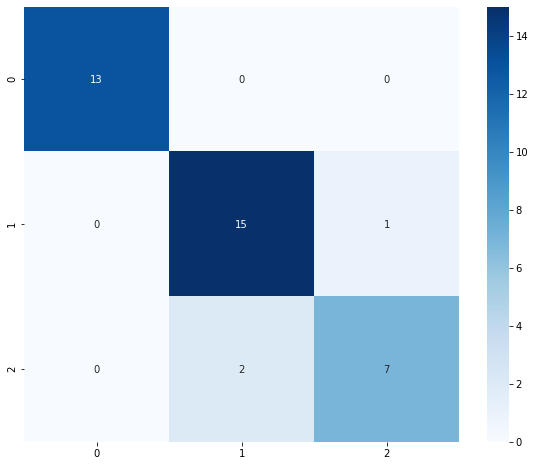

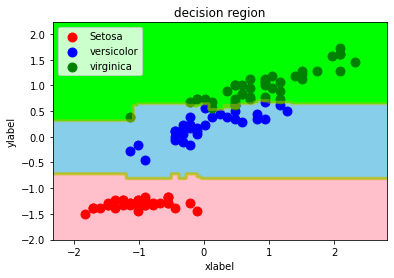

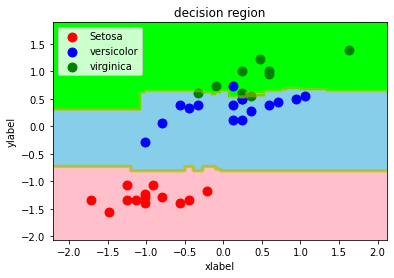

,Accuracy,Precision,Recall,F1_score
KNeighbors (5-NN),0.947368,0.947368,0.947368,0.947368
Logistic Regression,0.947368,0.947368,0.947368,0.947368
Support Vector Machine,0.947368,0.947368,0.947368,0.947368
Decision Tree,0.921053,0.921053,0.921053,0.921053
Random Forest,0.921053,0.921053,0.921053,0.921053


In [ ]:
def train_model_multiclass(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = score_metrics(y_test, y_pred, 'micro')
    decision_region_multiclass(X_train, y_train, model)
    decision_region_multiclass(X_test, y_test, model)
    return scores


scores = np.vstack([train_model_multiclass(new_X_train, new_y_train, new_X_test, new_y_test, KNeighborsClassifier()),
                    train_model_multiclass(new_X_train, new_y_train, new_X_test, new_y_test, LogisticRegression()),
                    train_model_multiclass(new_X_train, new_y_train, new_X_test, new_y_test, SVC()),
                    train_model_multiclass(new_X_train, new_y_train, new_X_test, new_y_test, DecisionTreeClassifier()),
                    train_model_multiclass(new_X_train, new_y_train, new_X_test, new_y_test, RandomForestClassifier())])
index_df = pd.DataFrame(scores, index=['KNeighbors (5-NN)', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest'], columns=score_labels)
index_df